Jaswanthan KS -Insurance Claim Prediction

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
df = pd.read_csv("E:\PYTHON\Projects\insurance3r2.csv")
df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


In [33]:
df.describe()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [34]:
df = df.dropna()

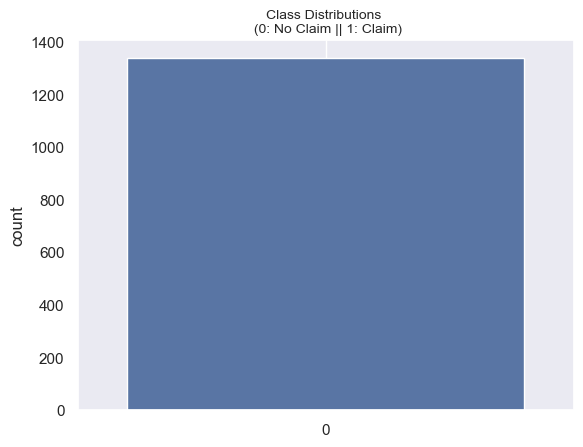

In [35]:
plt.title("Class Distributions \n (0: No Claim || 1: Claim)" , fontsize = 10)
sns.set(style="darkgrid")
sns.countplot(df['insuranceclaim'])
plt.grid()

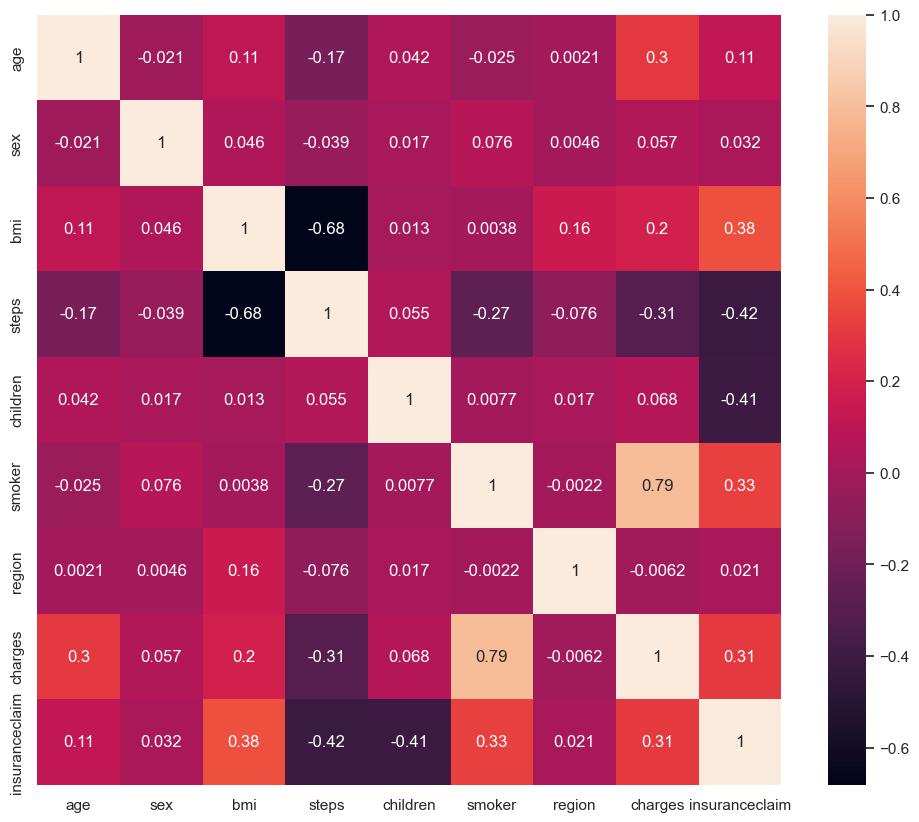

In [36]:
correlation = df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlation , annot=True)
plt.show()

In [37]:
df=df.drop('region',axis=1)
df.head()

,age,sex,bmi,steps,children,smoker,charges,insuranceclaim
0,19,0,27.900,3009,0,1,16884.92400,1
1,18,1,33.770,3008,1,0,1725.55230,1
2,28,1,33.000,3009,3,0,4449.46200,0
3,33,1,22.705,10009,0,0,21984.47061,0
4,32,1,28.880,8010,0,0,3866.85520,1


Text(0.5, 1.0, 'Age VS Chargers')

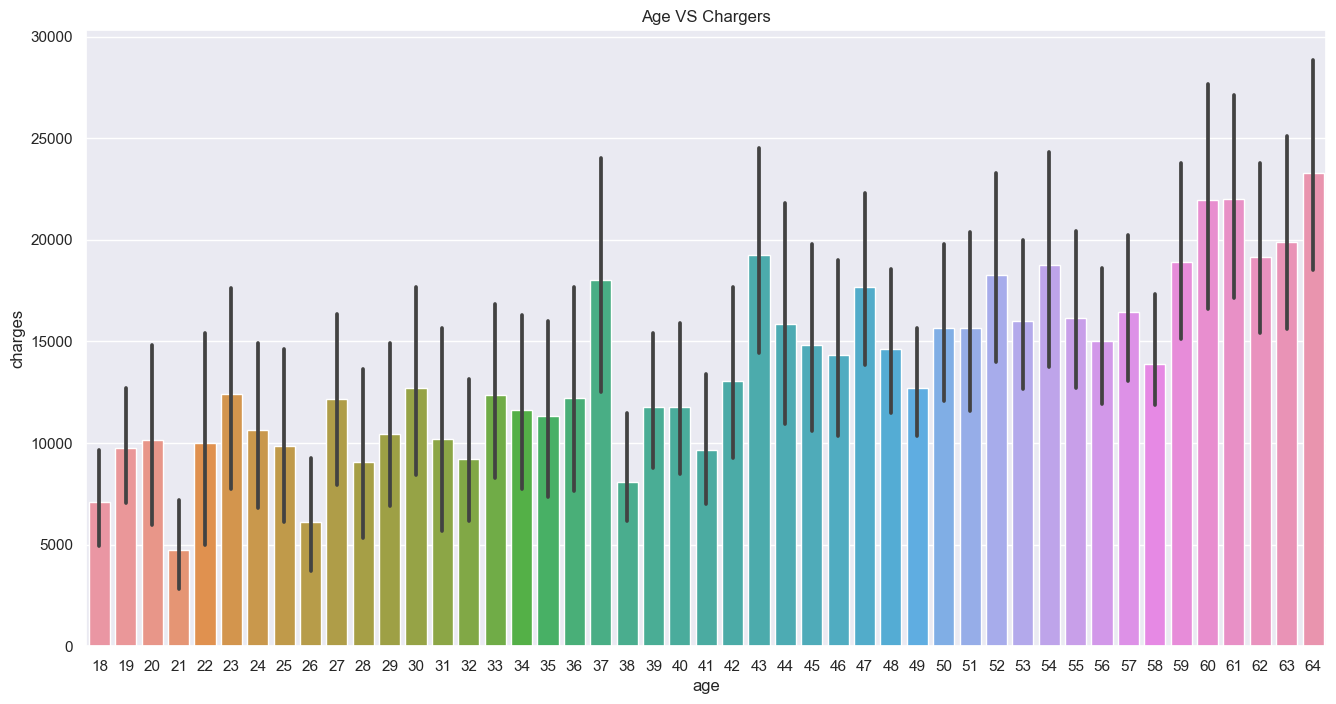

In [39]:
plt.figure(figsize = (16, 8))
sns.barplot(x = 'age', y = 'charges', data = df)
plt.title("Age VS Chargers")

Text(0.5, 1.0, 'Sex VS Chargers')

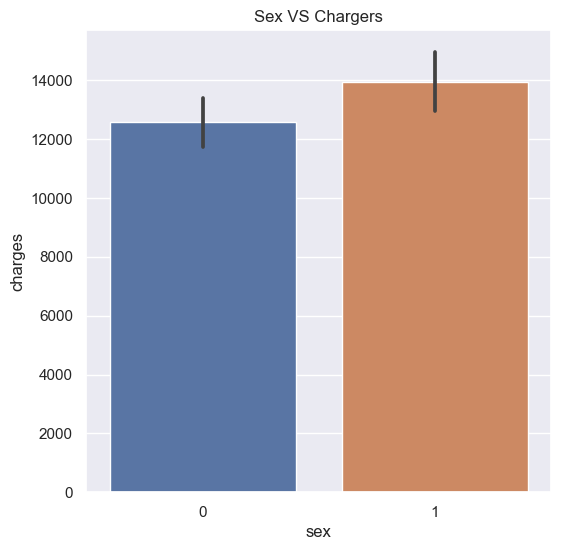

In [42]:
plt.figure(figsize = (6,6))
sns.barplot(x = 'sex', y = 'charges', data = df)
plt.title("Sex VS Chargers")

Text(0.5, 1.0, 'children vs charges')

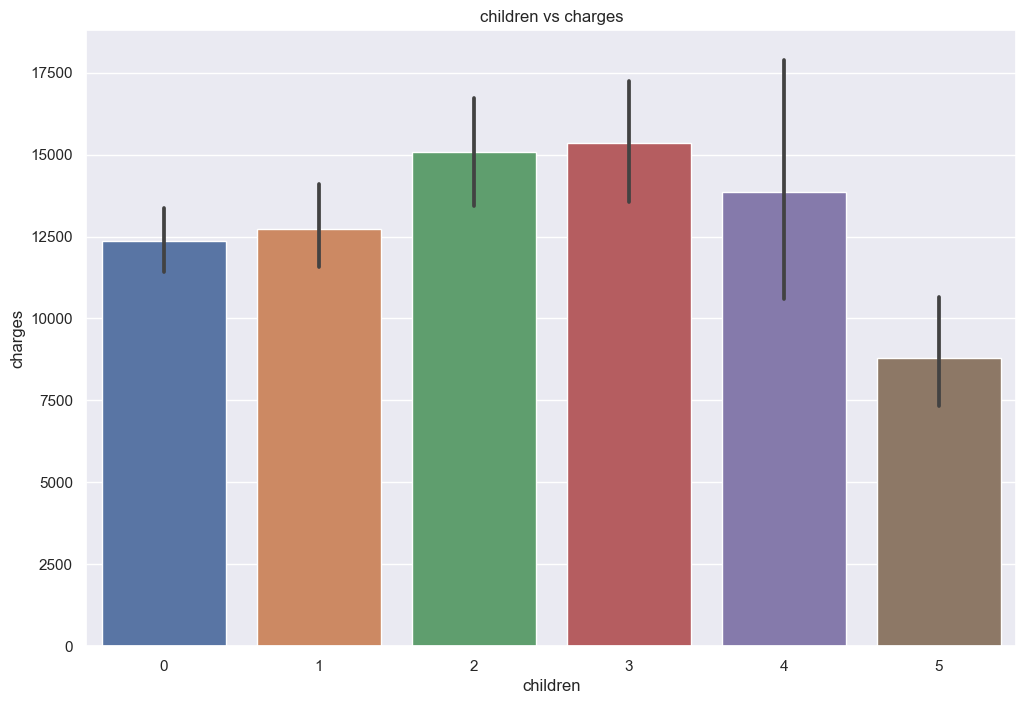

In [44]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'children', y = 'charges', data = df)
plt.title('children vs charges')

Text(0.5, 1.0, 'smoker vs charges')

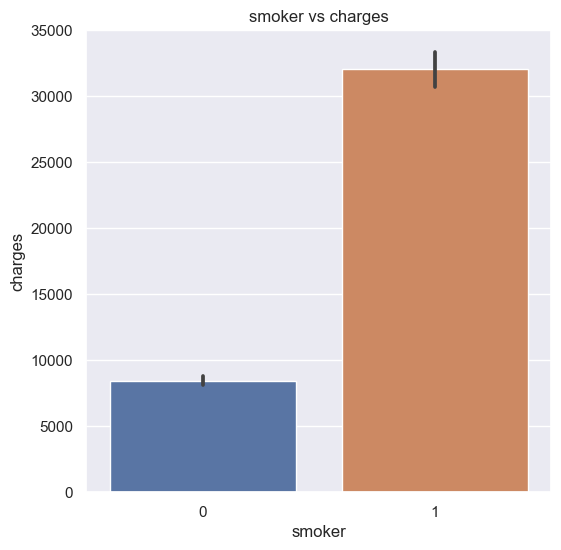

In [45]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = df)
plt.title('smoker vs charges')

PREDICTING BASED ON THE INSURANCE CLAIM

In [47]:
X=df.iloc[:,:-1]
X.head()

,age,sex,bmi,steps,children,smoker,charges
0,19,0,27.900,3009,0,1,16884.92400
1,18,1,33.770,3008,1,0,1725.55230
2,28,1,33.000,3009,3,0,4449.46200
3,33,1,22.705,10009,0,0,21984.47061
4,32,1,28.880,8010,0,0,3866.85520


In [50]:
y=df.iloc[:,-1]
y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , random_state=42 , test_size=0.3)

In [57]:
X_train

,age,sex,bmi,steps,children,smoker,charges
332,61,0,31.160,3009,0,0,13429.03540
355,46,1,27.600,8009,0,0,24603.04837
138,54,0,31.900,4007,3,0,27322.73386
381,55,1,30.685,3004,0,1,42303.69215
292,25,1,45.540,3004,2,1,42112.23560
...,...,...,...,...,...,...,...
1095,18,0,31.350,3010,4,0,4561.18850
1130,39,0,23.870,10000,5,0,8582.30230
1294,58,1,25.175,5010,0,0,11931.12525
860,37,0,47.600,4009,2,1,46113.51100


In [58]:
X_test

,age,sex,bmi,steps,children,smoker,charges
764,45,0,25.175,8007,2,0,9095.06825
887,36,0,30.020,4006,0,0,5272.17580
890,64,0,26.885,5005,0,1,29330.98315
1293,46,1,25.745,8001,3,0,9301.89355
259,19,1,31.920,3010,0,1,33750.29180
...,...,...,...,...,...,...,...
701,50,0,44.745,4009,0,0,9541.69555
672,36,1,29.700,8008,0,0,4399.73100
1163,18,0,28.215,8000,0,0,2200.83085
1103,58,1,36.080,4000,0,0,11363.28320


In [59]:
y_train

332     1
355     1
138     0
381     1
292     1
       ..
1095    0
1130    0
1294    0
860     1
1126    1
Name: insuranceclaim, Length: 936, dtype: int64

In [60]:
y_test

764     1
887     1
890     1
1293    1
259     1
       ..
701     1
672     1
1163    1
1103    1
1295    0
Name: insuranceclaim, Length: 402, dtype: int64

Standardising the X_train and X_test values

In [64]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_trainss= ss.fit_transform(X_train)
X_trainss
X_train=pd.DataFrame(X_trainss,columns=X_test.columns)
X_train


,age,sex,bmi,steps,children,smoker,charges
0,1.544465,-1.025978,0.103182,-0.954752,-0.915011,-0.512989,0.004121
1,0.481874,0.974679,-0.490845,1.069532,-0.915011,-0.512989,0.927409
2,1.048589,-1.025978,0.226660,-0.550705,1.560279,-0.512989,1.152132
3,1.119429,0.974679,0.023923,-0.956776,-0.915011,1.949359,2.389981
4,-1.005753,0.974679,2.502650,-0.956776,0.735182,1.949359,2.374161
...,...,...,...,...,...,...,...
931,-1.501628,-1.025978,0.134886,-0.954347,2.385375,-0.512989,-0.728612
932,-0.014001,-1.025978,-1.113238,1.875602,3.210472,-0.512989,-0.396355
933,1.331947,0.974679,-0.895484,-0.144633,-0.915011,-0.512989,-0.119648
934,-0.155680,-1.025978,2.846384,-0.549895,0.735182,1.949359,2.704779


In [65]:
X_testss= ss.fit_transform(X_test)
X_testss
X_test=pd.DataFrame(X_testss,columns=X_test.columns)
X_test

,age,sex,bmi,steps,children,smoker,charges
0,0.415902,-0.975426,-0.913284,1.148860,0.789344,-0.494552,-0.323910
1,-0.232690,-0.975426,-0.146665,-0.511576,-0.894032,-0.494552,-0.639621
2,1.785150,-0.975426,-0.642712,-0.096985,-0.894032,2.022031,1.347257
3,0.487967,1.025193,-0.823093,1.146370,1.631032,-0.494552,-0.306830
4,-1.457807,1.025193,0.153970,-0.924921,-0.894032,2.022031,1.712222
...,...,...,...,...,...,...,...
397,0.776230,-0.975426,2.183256,-0.510330,-0.894032,-0.494552,-0.287026
398,-0.232690,1.025193,-0.197298,1.149275,-0.894032,-0.494552,-0.711671
399,-1.529873,-0.975426,-0.432268,1.145955,-0.894032,-0.494552,-0.893265
400,1.352756,1.025193,0.812202,-0.514066,-0.894032,-0.494552,-0.136591


RANDOM FOREST MODEL

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [69]:
model = RandomForestClassifier()
model.fit(X_train , y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test , y_pred))

[[157   4]
 [ 16 225]]


In [72]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 0.95


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       161
           1       0.98      0.93      0.96       241

    accuracy                           0.95       402
   macro avg       0.95      0.95      0.95       402
weighted avg       0.95      0.95      0.95       402



In [76]:
from sklearn.model_selection import cross_val_score
acc=cross_val_score(estimator=model,X=X_train,y=y_train,cv=10)
acc.mean()
acc.std()

0.016909130611689045